<a href="https://colab.research.google.com/github/coder-j-0090/Self_Study/blob/main/Python_DataAnalysis_ML/8_1_%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/sample_submission.csv")

In [ ]:
train.shape

(26457, 20)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
train.isnull().sum()

train = train.drop("occyp_type", axis = 1)
test =  test.drop("occyp_type", axis = 1)

train.isnull().sum()

len(train['gender'].unique())

unique_len = train.apply(lambda x : len(x.unique()))

unique_len

index            26457
gender               2
car                  2
reality              2
child_num            9
income_total       249
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        6621
DAYS_EMPLOYED     3470
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
family_size         10
begin_month         61
credit               3
dtype: int64

In [ ]:
group_1 = unique_len[unique_len <= 2].index
group_1

group_2 = unique_len[(unique_len > 2) & (unique_len <= 10)].index
group_2

group_3 = unique_len[(unique_len > 10)].index
group_3


Index(['index', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month'], dtype='object')

In [ ]:
train[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,F,N,N,1,0,0,0
1,F,N,Y,1,0,0,1
2,M,Y,Y,1,0,1,0
3,F,N,Y,1,0,1,0
4,F,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
26452,F,N,N,1,0,0,0
26453,F,N,Y,1,0,0,0
26454,F,Y,N,1,0,0,0
26455,M,N,Y,1,0,0,0


In [ ]:
train['gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
train['gender']

0        F
1        F
2        M
3        F
4        F
        ..
26452    F
26453    F
26454    F
26455    M
26456    F
Name: gender, Length: 26457, dtype: object

In [ ]:
train['gender'] = train['gender'].replace(['F','M'], [0,  1])
test['gender'] = test['gender'].replace(['F','M'], [0,  1])

In [ ]:
train['gender']

0        0
1        0
2        1
3        0
4        0
        ..
26452    0
26453    0
26454    0
26455    1
26456    0
Name: gender, Length: 26457, dtype: int64

In [ ]:
train[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,N,N,1,0,0,0
1,0,N,Y,1,0,0,1
2,1,Y,Y,1,0,1,0
3,0,N,Y,1,0,1,0
4,0,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
26452,0,N,N,1,0,0,0
26453,0,N,Y,1,0,0,0
26454,0,Y,N,1,0,0,0
26455,1,N,Y,1,0,0,0


In [ ]:
train['car'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
train['car'] = train['car'].replace(['N', 'Y'], [0, 1])
test['car'] = test['car'].replace(['N', 'Y'], [0, 1])

In [ ]:
train[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,N,1,0,0,0
1,0,0,Y,1,0,0,1
2,1,1,Y,1,0,1,0
3,0,0,Y,1,0,1,0
4,0,1,Y,1,0,0,0
...,...,...,...,...,...,...,...
26452,0,0,N,1,0,0,0
26453,0,0,Y,1,0,0,0
26454,0,1,N,1,0,0,0
26455,1,0,Y,1,0,0,0


In [ ]:
train['reality'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
train['reality'] = train['reality'].replace(['N', 'Y'], [0, 1])
test['reality'] = test['reality'].replace(['N', 'Y'], [0, 1])

In [ ]:
train[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1
2,1,1,1,1,0,1,0
3,0,0,1,1,0,1,0
4,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
26452,0,0,0,1,0,0,0
26453,0,0,1,1,0,0,0
26454,0,1,0,1,0,0,0
26455,1,0,1,1,0,0,0


In [ ]:
train[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
26452,2,State servant,Secondary / secondary special,Married,House / apartment,4.0,1.0
26453,1,Working,Higher education,Separated,House / apartment,2.0,2.0
26454,0,Working,Secondary / secondary special,Civil marriage,With parents,2.0,2.0
26455,0,Working,Incomplete higher,Single / not married,House / apartment,1.0,2.0


In [ ]:
train[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1
2,1,1,1,1,0,1,0
3,0,0,1,1,0,1,0
4,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
26452,0,0,0,1,0,0,0
26453,0,0,1,1,0,0,0
26454,0,1,0,1,0,0,0
26455,1,0,1,1,0,0,0


In [ ]:
train[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
26452,2,State servant,Secondary / secondary special,Married,House / apartment,4.0,1.0
26453,1,Working,Higher education,Separated,House / apartment,2.0,2.0
26454,0,Working,Secondary / secondary special,Civil marriage,With parents,2.0,2.0
26455,0,Working,Incomplete higher,Single / not married,House / apartment,1.0,2.0


<Axes: >

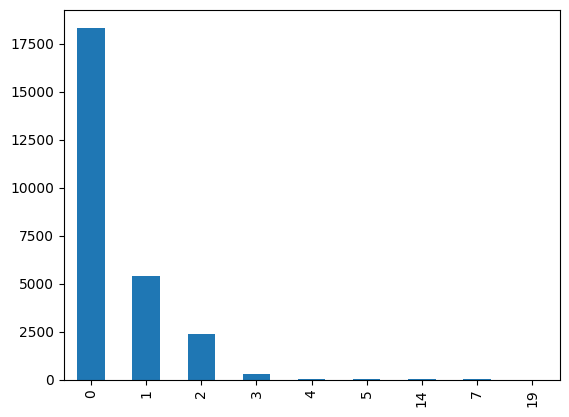

In [ ]:
train["child_num"].value_counts().plot.bar()

In [ ]:
train.loc[train['child_num'] > 2, 'child_num'] = 2

<Axes: >

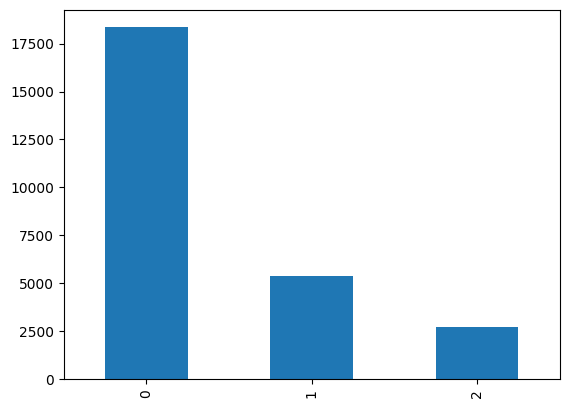

In [ ]:
train["child_num"].value_counts().plot.bar()

In [ ]:
train[group_2].apply(lambda x : len(x.unique()))

child_num       3
income_type     5
edu_type        5
family_type     5
house_type      6
family_size    10
credit          3
dtype: int64

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

train['income_type'].unique()

set(label_encoder.fit_transform(train['income_type']))

train['income_type'] = label_encoder.fit_transform(train['income_type'])
test['income_type'] = label_encoder.transform(test['income_type'])

train['edu_type'] = label_encoder.fit_transform(train['edu_type'])
test['edu_type'] = label_encoder.transform(test['edu_type'])

train['family_type'] = label_encoder.fit_transform(train['family_type'])
test['family_type'] = label_encoder.transform(test['family_type'])

train['house_type'] = label_encoder.fit_transform(train['house_type'])
test['house_type'] = label_encoder.transform(test['house_type'])


In [ ]:
train[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,0,1,1,2,2.0,1.0
1,1,0,4,0,1,3.0,1.0
2,0,4,1,1,1,2.0,2.0
3,0,0,4,1,1,2.0,0.0
4,0,2,1,1,1,2.0,2.0
...,...,...,...,...,...,...,...
26452,2,2,4,1,1,4.0,1.0
26453,1,4,1,2,1,2.0,2.0
26454,0,4,4,0,5,2.0,2.0
26455,0,4,2,3,1,1.0,2.0


In [ ]:
train[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,202500.0,-13899,-4709,-6.0
1,1,247500.0,-11380,-1540,-5.0
2,2,450000.0,-19087,-4434,-22.0
3,3,202500.0,-15088,-2092,-37.0
4,4,157500.0,-15037,-2105,-26.0
...,...,...,...,...,...
26452,26452,225000.0,-12079,-1984,-2.0
26453,26453,180000.0,-15291,-2475,-47.0
26454,26454,292500.0,-10082,-2015,-25.0
26455,26455,171000.0,-10145,-107,-59.0


In [ ]:
train[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,202500.0,-13899,-4709,-6.0
1,1,247500.0,-11380,-1540,-5.0
2,2,450000.0,-19087,-4434,-22.0
3,3,202500.0,-15088,-2092,-37.0
4,4,157500.0,-15037,-2105,-26.0
...,...,...,...,...,...
26452,26452,225000.0,-12079,-1984,-2.0
26453,26453,180000.0,-15291,-2475,-47.0
26454,26454,292500.0,-10082,-2015,-25.0
26455,26455,171000.0,-10145,-107,-59.0


In [ ]:
train['income_total'].min()

27000.0

In [ ]:
train['income_total'].max()

1575000.0

In [ ]:
len(train['income_total'].unique())

249

In [ ]:
import numpy as np

counts, bin_dividers = np.histogram(train['income_total'], bins = 7)

train['income_total']

train['income_total'] = pd.factorize(pd.cut(train['income_total'],
                                        bins = bin_dividers,
                                        include_lowest=True,
                                        labels = [i for i in range(7)]))[0]

test['income_total'] = pd.factorize(pd.cut(test['income_total'],
                                     bins = bin_dividers,
                                     include_lowest=True,
                                      labels = [i for i in range(7)]))[0]


In [ ]:
train['income_total']

0        0
1        0
2        1
3        0
4        0
        ..
26452    0
26453    0
26454    1
26455    0
26456    0
Name: income_total, Length: 26457, dtype: int64

In [ ]:
train['DAYS_BIRTH']

0       -13899
1       -11380
2       -19087
3       -15088
4       -15037
         ...  
26452   -12079
26453   -15291
26454   -10082
26455   -10145
26456   -19569
Name: DAYS_BIRTH, Length: 26457, dtype: int64

In [ ]:
train.shape

(26457, 19)

In [ ]:
def make_bin(variable, n):
    train[variable]=-train[variable]
    test[variable]=-test[variable]
    count, bin_dividers =np.histogram(train[variable], bins=n) #train의 구간화를 적용
    bin_names=[str(i) for i in range(n)]
    train[variable]=pd.cut(x=train[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable]=pd.cut(x=test[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable].fillna(str(0), inplace=True) #test에는 없는 것을 임의의 값으로 채움
    ##########################################################
    train[variable]=label_encoder.fit_transform(train[variable])
    test[variable]=label_encoder.transform(test[variable])

In [ ]:
make_bin('DAYS_BIRTH', n=10)
make_bin('DAYS_EMPLOYED', n=6)
make_bin('begin_month', n=4)

In [ ]:
train[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,0,3,1,0
1,1,0,2,1,0
2,2,1,6,1,1
3,3,0,4,1,2
4,4,0,4,1,1
...,...,...,...,...,...
26452,26452,0,2,1,0
26453,26453,0,4,1,3
26454,26454,1,1,1,1
26455,26455,0,1,1,3


In [ ]:
train.shape

(26457, 19)

In [ ]:
test.shape

(10000, 18)

In [ ]:
#test = data[-10000:]

#train = data[:-10000]

train_x = train.drop("credit", axis = 1)

train_y = train['credit']

In [ ]:
#test_x = test.drop("credit", axis = 1)
test_x = test

train_x.shape


(26457, 18)

In [ ]:
train_y.shape

(26457,)

In [ ]:
test_x.shape

(10000, 18)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

train_y.shape


(26457,)

In [ ]:
clf.fit(train_x, train_y)

train_proba = clf.predict_proba(train_x)

train_proba[:10]

np.argmax(train_proba, axis = 1)[:10]

array([1, 1, 2, 0, 2, 1, 2, 0, 2, 2])

In [ ]:
sample_submission.iloc[:,1:] =  clf.predict_proba(test_x)

sample_submission

sample_submission.to_csv("sample_submission_ver1.csv", index = False)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y,
                 stratify = train_y,
                 test_size = 0.25,
                 random_state = 10086
                 )

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_proba = clf.predict_proba(X_val)

y_val_onehot = pd.get_dummies(y_val)

y_proba

y_val_onehot


(19842, 18) (6615, 18) (19842,) (6615,)


,0.0,1.0,2.0
36,0,0,1
3464,0,0,1
2640,0,0,1
22500,0,1,0
17275,0,1,0
...,...,...,...
6806,0,1,0
23096,0,0,1
7756,0,0,1
23331,0,0,1


In [ ]:
from sklearn.metrics import log_loss

log_loss(y_val_onehot, y_proba)

from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)

In [ ]:
outcomes = []
for n_fold, (train_index, val_index)  in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_val)
    y_val_onehot = pd.get_dummies(y_val)

    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)

np.mean(outcomes)


1.0539705285499077

In [ ]:
np.mean(outcomes)

1.0539705285499077

In [ ]:
outcomes = []
sub = np.zeros((test_x.shape[0],3))
for n_fold, (train_index, val_index)  in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_val)
    y_val_onehot = pd.get_dummies(y_val)

    sub += clf.predict_proba(test_x)

    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)

sub = sub / 5


In [ ]:
np.mean(outcomes)


1.0600559045502067

In [ ]:
sub

sample_submission.iloc[:,1:] =  sub

sample_submission.to_csv("5fold_prediction.csv", index = False)
